In [1]:
import pandas as pd

s = pd.Series([1, 2, 3, 4, 5])
print(s)


0    1
1    2
2    3
3    4
4    5
dtype: int64


In [5]:
print(s[0])

555


In [4]:
s[0] = 555

In [9]:
df = pd.DataFrame({
    'name': ['John', 'Smith'],
    'age': [30, 40]
})

print(df.at[1])

TypeError: DataFrame._get_value() missing 1 required positional argument: 'col'

In [11]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [15]:
df??

Type:        DataFrame
String form:
    name  age
0   John   30
1  Smith   40
Length:      2
File:        c:\users\koutb\appdata\local\programs\python\python311\lib\site-packages\pandas\core\frame.py
Source:     
class DataFrame(NDFrame, OpsMixin):
    """
    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclass or list-like objects. If
        data is a dict, column order follows insertion-order. If a dict contains Series
        which have an index defined, it is aligned by its index. This alignment also
        occurs if data is a Series or a DataFrame itself. Alignm

In [18]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [4, 5, 6], 'baz': [7, 8, 9]})

# select columns starting with 'b'
print(df.filter(like='b'))

# select columns ending with 'o'
print(df.filter(like='o', axis=1))

   bar  baz
0    4    7
1    5    8
2    6    9
   foo
0    1
1    2
2    3


In [20]:
df.index = ['a', 'b', 'c']

In [21]:
df

,foo,bar,baz
a,1,4,7
b,2,5,8
c,3,6,9


In [30]:
df.ix[:,'foo']

AttributeError: 'DataFrame' object has no attribute 'ix'

In [35]:
df['foo'].loc['a']


1

In [36]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}, index=['x', 'y', 'z'])
# single cell
print(df.at['x', 'a'])

# or
print(df.iat[0, 0])

# multiple cells
print(df.loc['x':'y', 'a':'b'])

1
1
   a  b
x  1  4
y  2  5


In [24]:
import pandas as pd
url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [4]:
df.groupby('country')['gdpPercap'].mean()


country
Afghanistan            802.674598
Albania               3255.366633
Algeria               4426.025973
Angola                3607.100529
Argentina             8955.553783
                         ...     
Vietnam               1017.712615
West Bank and Gaza    3759.996781
Yemen Rep.            1569.274672
Zambia                1358.199409
Zimbabwe               635.858042
Name: gdpPercap, Length: 142, dtype: float64

In [5]:
df.groupby('country')['gdpPercap'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

,mean,median,std,min,max,count
country,,,,,,
Afghanistan,802.674598,803.483195,108.202929,635.341351,978.011439,12
Albania,3255.366633,3253.238396,1192.351513,1601.056136,5937.029526,12
Algeria,4426.025973,4853.855903,1310.337656,2449.008185,6223.367465,12
Angola,3607.100529,3264.628814,1165.900251,2277.140884,5522.776375,12
Argentina,8955.553783,9068.784401,1862.583151,5911.315053,12779.379640,12
...,...,...,...,...,...,...
Vietnam,1017.712615,742.793140,567.482251,605.066492,2441.576404,12
West Bank and Gaza,3759.996781,3408.120386,1716.840614,1515.592329,7110.667619,12
Yemen Rep.,1569.274672,1854.630925,609.939160,781.717576,2280.769906,12


In [6]:
print(df.corr())
print(df.cov())

ValueError: could not convert string to float: 'Afghanistan'

In [7]:
corr_matrix = df[['year', 'pop', 'lifeExp', 'gdpPercap']].corr()
cov_matrix = df[['year', 'pop', 'lifeExp', 'gdpPercap']].cov()

In [8]:
corr_matrix

,year,pop,lifeExp,gdpPercap
year,1.000000,0.082308,0.435611,0.227318
pop,0.082308,1.000000,0.064955,-0.025600
lifeExp,0.435611,0.064955,1.000000,0.583706
gdpPercap,0.227318,-0.025600,0.583706,1.000000


In [9]:
cov_matrix

,year,pop,lifeExp,gdpPercap
year,2.980916e+02,1.508584e+08,9.714919e+01,3.868776e+04
pop,1.508584e+08,1.126950e+16,8.907024e+07,-2.678859e+10
lifeExp,9.714919e+01,8.907024e+07,1.668517e+02,7.432320e+04
gdpPercap,3.868776e+04,-2.678859e+10,7.432320e+04,9.716941e+07


<Axes: ylabel='Frequency'>

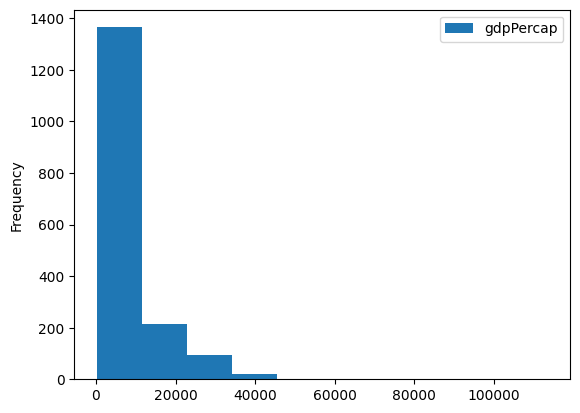

In [10]:
df.gdpPercap.corr(df


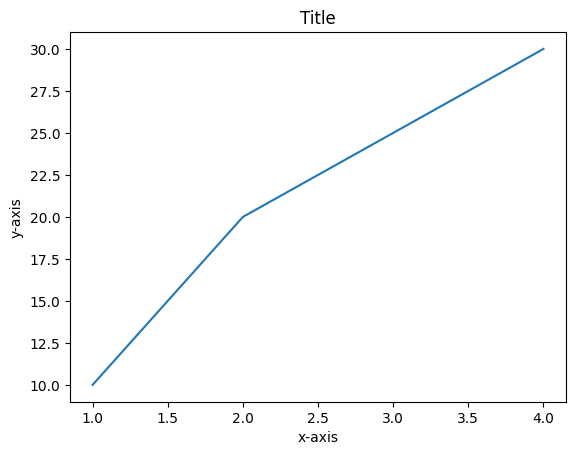

In [19]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

# Create a subplot 
ax = fig.add_subplot(111)
# this creates a 1x1 grid of subplots and returns the first one
# alternatively, you can use fig.add_subplot(1, 1, 1)

# Plot data on the subplot
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
# x-axis is the first list and y-axis is the second list
# replace lists with pandas series or numpy arrays

# Customize the plot
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Title')

# Save the plot
plt.savefig('plot.png')

# Show the plot
plt.show()

In [31]:
sns.set_theme(style='whitegrid') # alternatives include 'darkgrid', 'white', 
                                 # 'dark', 'ticks'
sns.set_palette('pastel') # alternatives include 'deep', 'muted', 
                          # 'bright', 'dark', 'colorblind'
sns.set_context('talk') # this sets the font size for talk
           

<Axes: xlabel='continent', ylabel='count'>

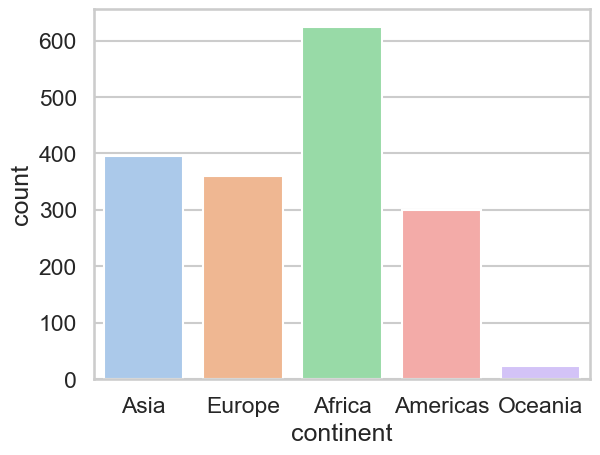

In [32]:
sns.countplot(x='continent', data=df)


In [36]:
df = pd.DataFrame({'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
                   'B': ['one', 'one', 'two', 'two', 'one', 'one'],
                   'C': ['small', 'large', 'large', 'small', 'small', 'large'],
                   'D': [1, 2, 2, 3, 3, 4]})
print(df)

# pivot table
print(df.pivot_table(index='A', columns=['B', 'C'], values='D', aggfunc='sum', fill_value=0, margins=True, margins_name='Total'))

     A    B      C  D
0  foo  one  small  1
1  foo  one  large  2
2  foo  two  large  2
3  bar  two  small  3
4  bar  one  small  3
5  bar  one  large  4
B       one         two           Total
C     large small large small          
A                                      
bar       4     3     0     3  3.333333
foo       2     1     2     0  1.666667
Total     3     2     2     3  2.500000


In [37]:
df = pd.DataFrame({'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
                   'B': ['one', 'one', 'two', 'two', 'one', 'one'],
                   'C': ['small', 'large', 'large', 'small', 'small', 'large'],
                   'D': [1, 2, 2, 3, 3, 4]})
print(df)

# melt
print(df.melt(id_vars=['A', 'B'], value_vars=['C', 'D'], var_name='variable', value_name='value'))

     A    B      C  D
0  foo  one  small  1
1  foo  one  large  2
2  foo  two  large  2
3  bar  two  small  3
4  bar  one  small  3
5  bar  one  large  4
      A    B variable  value
0   foo  one        C  small
1   foo  one        C  large
2   foo  two        C  large
3   bar  two        C  small
4   bar  one        C  small
5   bar  one        C  large
6   foo  one        D      1
7   foo  one        D      2
8   foo  two        D      2
9   bar  two        D      3
10  bar  one        D      3
11  bar  one        D      4


c:\Users\koutb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


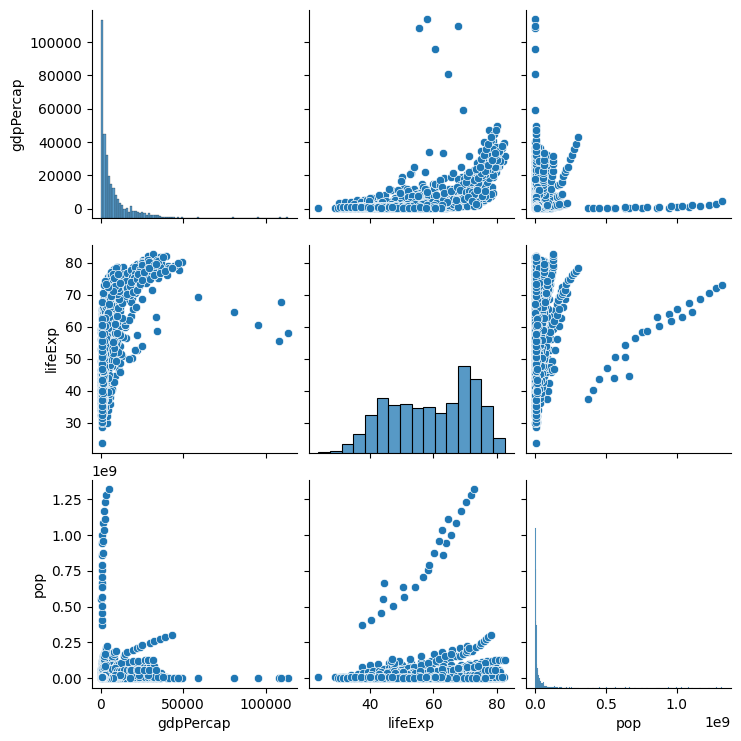

In [27]:
sns.pairplot(df[['gdpPercap', 'lifeExp', 'pop']])


<Axes: xlabel='continent', ylabel='gdpPercap'>

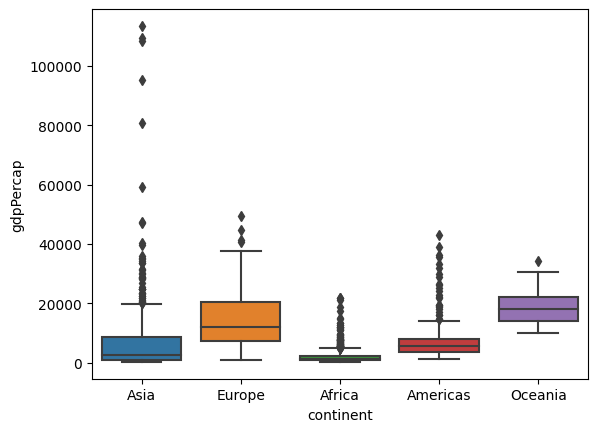

In [26]:
sns.boxplot(x='continent', y='gdpPercap', data=df)


<Axes: xlabel='year', ylabel='gdpPercap'>

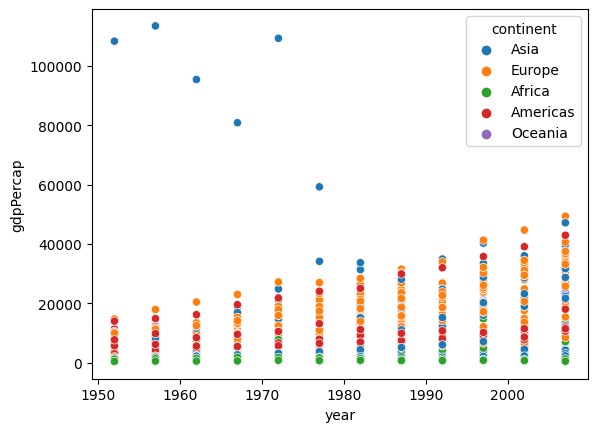

In [25]:
sns.scatterplot(x='year', y='gdpPercap', data=df, hue='continent')


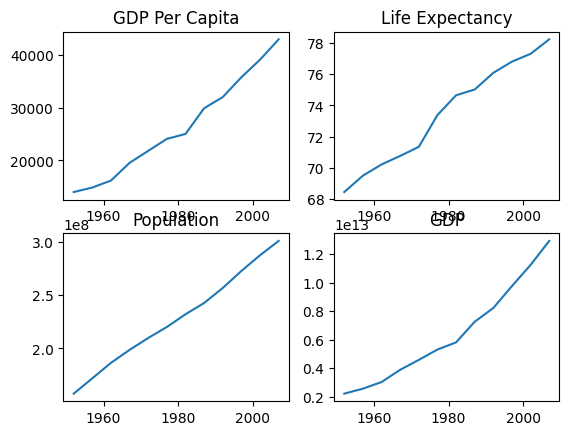

In [21]:
fig, axs = plt.subplots(2, 2)

# select rows from df where country is 'United States'
df = df[df['country'] == 'United States']

axs[0, 0].plot(df['year'], df['gdpPercap'])
axs[0, 0].set_title('GDP Per Capita')

axs[0, 1].plot(df['year'], df['lifeExp'])
axs[0, 1].set_title('Life Expectancy')

axs[1, 0].plot(df['year'], df['pop'])
axs[1, 0].set_title('Population')

axs[1, 1].plot(df['year'], df['gdpPercap'] * df['pop'])
axs[1, 1].set_title('GDP')

plt.show()

In [38]:
df = pd.DataFrame({
    'Name': ['John Smith', 'Jane Doe', 'Mary Johnson'],
    'treatmenta': [None, 16, 3],  # Assuming '—' represents missing data
    'treatmentb': [2, 11, 1]
})

# Melt the DataFrame to long format
df_long = df.melt(id_vars=['Name'], var_name='Treatment', value_name='Result')

# Display the tidy DataFrame
print(df_long)

           Name   Treatment  Result
0    John Smith  treatmenta     NaN
1      Jane Doe  treatmenta    16.0
2  Mary Johnson  treatmenta     3.0
3    John Smith  treatmentb     2.0
4      Jane Doe  treatmentb    11.0
5  Mary Johnson  treatmentb     1.0


In [39]:
df_long.pivot(index='Name', columns='Treatment', values='Result')


Treatment,treatmenta,treatmentb
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [40]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('mtcars').data

In [2]:
import statsmodels.api as sm

data = sm.datasets.longley.load_pandas()

print(data.data) # whole dataset
print(data.endog) # endogenous variable
print(data.exog) # exogenous variables

print(data.endog_name)
print(data.exog_name)

res = sm.OLS(data.endog, data.exog).fit()
print(res.summary())



     TOTEMP  GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0   60323.0     83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1   61122.0     88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2   60171.0     88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3   61187.0     89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4   63221.0     96.2  328975.0  2099.0  3099.0  112075.0  1951.0
5   63639.0     98.1  346999.0  1932.0  3594.0  113270.0  1952.0
6   64989.0     99.0  365385.0  1870.0  3547.0  115094.0  1953.0
7   63761.0    100.0  363112.0  3578.0  3350.0  116219.0  1954.0
8   66019.0    101.2  397469.0  2904.0  3048.0  117388.0  1955.0
9   67857.0    104.6  419180.0  2822.0  2857.0  118734.0  1956.0
10  68169.0    108.4  442769.0  2936.0  2798.0  120445.0  1957.0
11  66513.0    110.8  444546.0  4681.0  2637.0  121950.0  1958.0
12  68655.0    112.6  482704.0  3813.0  2552.0  123366.0  1959.0
13  69564.0    114.2  502601.0  3931.0  2514.0  125368.0  1960.0
14  69331.0    115.7  518

c:\Users\koutb\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.star98.load_pandas()
print(data.data)

res = smf.glm(
  'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT',
  data=data.data, 
  family=sm.families.Binomial()
).fit()


print(res.summary())

     NABOVE  NBELOW    LOWINC   PERASIAN   PERBLACK    PERHISP   PERMINTE  \
0     452.0   355.0  34.39730  23.299300  14.235280  11.411120  15.918370   
1     144.0    40.0  17.36507  29.328380   8.234897   9.314884  13.636360   
2     337.0   234.0  32.64324   9.226386  42.406310  13.543720  28.834360   
3     395.0   178.0  11.90953  13.883090   3.796973  11.443110  11.111110   
4       8.0    57.0  36.88889  12.187500  76.875000   7.604167  43.589740   
..      ...     ...       ...        ...        ...        ...        ...   
298    96.0   246.0  62.23968  13.820860   3.956157  32.128790  15.884480   
299    37.0   117.0  46.16188   1.150575   0.800400  45.622810  13.333330   
300   208.0   387.0  43.41431   3.648564   1.541204  46.319980  21.377670   
301   199.0   510.0  70.62104  20.461720   2.989345  17.423050  11.032860   
302    72.0    84.0  77.74827   5.998899   9.576225  11.117230   7.874016   

     AVYRSEXP    AVSALK  PERSPENK  ...  PCTCHRT   PCTYRRND  PERMINTE_AVYRSE

PatsyError: Error evaluating factor: NameError: name 'SUCCESS' is not defined
    SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT
    ^^^^^^^

In [47]:
data.endog

,NABOVE,NBELOW
0,452.0,355.0
1,144.0,40.0
2,337.0,234.0
3,395.0,178.0
4,8.0,57.0
...,...,...
298,96.0,246.0
299,37.0,117.0
300,208.0,387.0
301,199.0,510.0


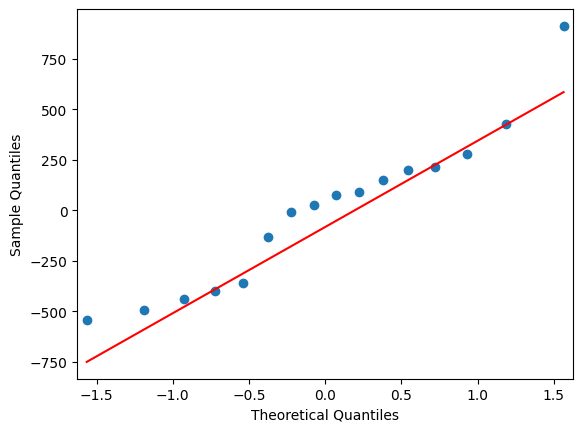

In [15]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# use res from the previous example
#do qqplot
fig = sm.graphics.qqplot(res.resid, line='q')
plt.show()

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('epil', package='MASS').data
print(data)

mod = smf.glm(
  "y ~ age + trt + base", 
  data,
  family=sm.families.Poisson()
)

res = mod.fit()

print(res.summary())

# check for overdispersion 
if res.pearson_chi2 / res.df_resid > 1:
    print('We have overdispersion')
else:
    print('No evidence to suggest overdispersion')


     y        trt  base  age  V4  subject  period     lbase      lage
0    5    placebo    11   31   0        1       1 -0.756354  0.114204
1    3    placebo    11   31   0        1       2 -0.756354  0.114204
2    3    placebo    11   31   0        1       3 -0.756354  0.114204
3    3    placebo    11   31   1        1       4 -0.756354  0.114204
4    3    placebo    11   30   0        2       1 -0.756354  0.081414
..  ..        ...   ...  ...  ..      ...     ...       ...       ...
231  0  progabide    13   36   1       58       4 -0.589300  0.263735
232  1  progabide    12   37   0       59       1 -0.669342  0.291134
233  4  progabide    12   37   0       59       2 -0.669342  0.291134
234  3  progabide    12   37   0       59       3 -0.669342  0.291134
235  2  progabide    12   37   1       59       4 -0.669342  0.291134

[236 rows x 9 columns]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:

c:\Users\koutb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 1 1 1]
[0 1]
[[1. 2.]
 [4. 2.]]


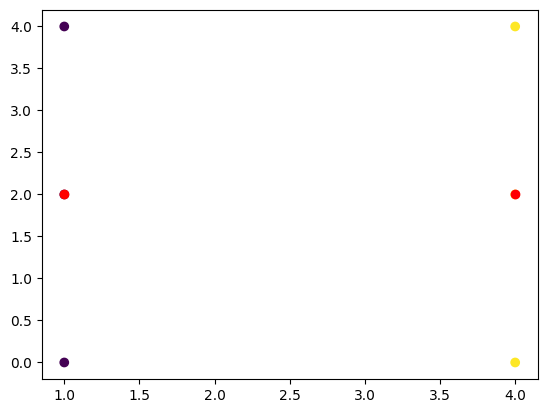

In [22]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print(kmeans.labels_)
print(kmeans.predict([[0, 0], [4, 4]]))
print(kmeans.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()